# Problem 4

In this problem, you will perform PCA on a dataset. I have hidden an object into a larger dataset. The object is saved as a point cloud. Your goal is to write a program implementing PCA to examine
the dataset, find its dimensionality, find the principal axes of the data, then do a projection to find the hidden object.

The dataset to process is called “Datafile.csv”, available on Blackboard. You may assume the data is organized in rows (as in class).  That is, each row is a measurement series, with different samples along the columns.  Note that I have added a small amount of noise to all data to simulate the effect of measurement error.  Therefore, once you discover the figure, it may have a little bit of noise on it.

You don't need a test function for this problem.  Rather, hand in a plot showing the object you found.  Also, please answer the following questions:

- How many dimensions of the data hold useful information, and how many are noise?
- What object did I hide in the data?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Uploaded my CSV to GitHub to be able to read it from the cloud in Colab
df = pd.read_csv('https://gist.githubusercontent.com/kamath/90baab18a706ab5e022d7bbe7b59b8bf/raw/b3734d050cf23614021e390fc907a4f1df1a9a9c/Datafile.csv', header=None)
mat = df.to_numpy()

# Normalize the data for Scikit-Learn PCA
for i in range(mat.shape[1]):
    mat[:, i] = mat[:, i] / np.linalg.norm(mat[:, i])
print(mat.shape)

(11, 1917)


Components (11, 11)
(1917, 11)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.212185,-0.232629,0.028402,-0.002026,-0.004504,0.007481,0.001808,-0.002231,-0.004351,-0.005762,0.002807
1,0.203658,-0.234524,0.027027,0.004867,0.002495,-0.001695,-0.002844,0.000491,-0.000626,0.003384,0.002001
2,-0.076987,-0.298201,0.026820,-0.003244,0.001818,0.004776,0.001425,0.000371,-0.006925,0.000051,-0.000852
3,-0.092702,-0.296948,0.028009,-0.006580,-0.002427,0.003953,0.004404,-0.002487,0.001822,0.001790,0.001075
4,-0.075713,-0.291440,0.024857,-0.005834,0.006055,0.001418,0.005872,-0.001234,0.005994,-0.003391,-0.003385
...,...,...,...,...,...,...,...,...,...,...,...
1912,0.152470,0.061448,-0.000067,0.001359,-0.004355,0.002267,-0.000225,-0.000991,-0.002249,0.002224,0.000787
1913,0.187773,-0.134163,0.007589,0.000730,-0.000958,0.001863,-0.001496,0.003682,-0.001076,0.002381,0.000018
1914,0.165294,-0.130974,0.003433,0.000099,-0.001549,-0.004011,0.001890,0.000886,0.001723,-0.003783,0.002239
1915,0.146895,0.038993,-0.002642,-0.001411,-0.003227,0.001137,0.002067,0.002939,-0.001024,0.000616,0.000307


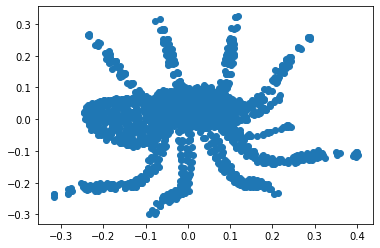

In [8]:
from sklearn.decomposition import PCA

# Perform PCA such that it retains 99.99% of the data
pca = PCA(.9999).fit(mat.T)
print("Components", pca.components_.shape)
# 11 component axes, rest are noise (1906)

# Project onto 2D plane
out = pca.transform(mat.T)
pca_df = pd.DataFrame(out, columns=[f"PC{i + 1}" for i in range(out.shape[1])])
print(out.shape)

plt.scatter(out[:, 0], out[:, 1])
pca_df

# The "object" is a spider